In [1]:
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from scipy import ndimage
%matplotlib inline 
import scipy
from PIL import Image


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

IMPORT IMAGE

In [11]:
img=cv2.imread("/home/songbird/Desktop/probamap/export.png")

In [14]:
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])


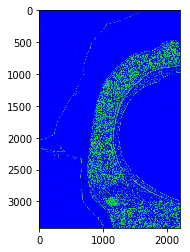

In [20]:
plt.imshow(img)

BINARIZATION

In [21]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

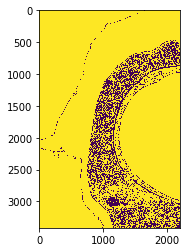

In [55]:
plt.imshow(thresh)

NOISE REMOVAL 

In [71]:
# noise removal
kernel = np.ones((1,1),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
#closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)


Extract region sure background

In [72]:
# sure background area
sure_bg = cv2.dilate(thresh,kernel,iterations=3)

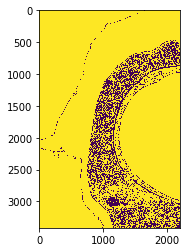

In [73]:
plt.imshow(sure_bg)

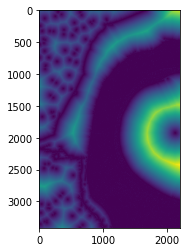

In [81]:
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
plt.imshow(dist_transform)

In [149]:
ret, sure_fg = cv2.threshold(distance,0.006*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)

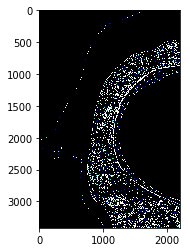

In [150]:
plt.imshow(sure_fg)

In [154]:
# Threshold
ret, sure_fg = cv2.threshold(distance,0.006*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
#unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

plt.imshow(markers)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/imgproc/src/connectedcomponents.cpp:3932: error: (-215) L.channels() == 1 && I.channels() == 1 in function connectedComponents_sub1


In [101]:
markers = markers + 1
markers[unknown==255]=0
markers=cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

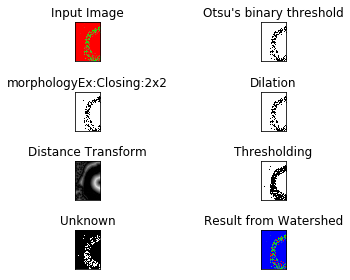

In [102]:

plt.subplot(421),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(423),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(425),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.subplot(427),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])

plt.subplot(428),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

/home/songbird/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


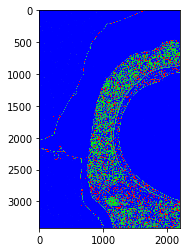

In [106]:
plt.imshow(img)
import scipy.misc
scipy.misc.imsave('/home/songbird/Desktop/segmentation.jpg', markers)

In [147]:
img=cv2.imread("/home/songbird/Desktop/probamap/export.png")
distance = ndi.distance_transform_edt(img)

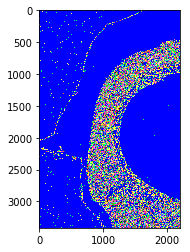

In [139]:
plt.imshow(distance)
local_maxi = peak_local_max(distance, indices=False, 
                            labels=img)

In [140]:
markers = ndi.label(local_maxi)[0]

In [141]:
labels = watershed(-distance, markers)


In [142]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

ValueError: Floating point image RGB values must be in the 0..1 range.

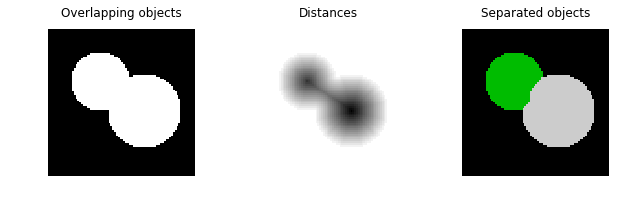

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()


fig.tight_layout()
plt.show()


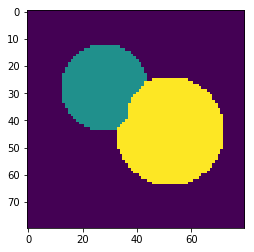

In [145]:
plt.imshow(labels)